# Course: 3D Data processing in structural biology 
## Project: Classification of molecules to "families"




---

Authors: Shay Guterman & Oren Wintner



### Install tensorflow-gpu

In [192]:
!pip install tensorflow-gpu==1.14
# !pip install tensorboardcolab
print('Tensorflow instalations completed!')



Tensorflow instalations completed!


### Mount Drive

In [193]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Import data

In [194]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle


path_to_data_dir = "/content/gdrive/My Drive/DL-ML/3D molecular Aligned/"

all_data = np.load((path_to_data_dir + 'X_train_aligned.npy'))
all_labels = np.load((path_to_data_dir + 'X_label_aligned.npy'))
# Data taken from 57 families , 400 examples for each family
families_num_data = 40
families_example_data = 400

print(('Shape of data (N_families = 57 * N_examples = 400, 256 points, 3 xyz )',all_data.shape))
print(('Shape of labels (N_families = 57 * N_examples = 400)',all_labels.shape))


train_points_r, test_points_r, train_labels_r, test_labels_r = train_test_split(
    all_data,all_labels, test_size=0.2, random_state=1)  # 1 was used previously

print(('Train points shape: ' ,train_points_r.shape))
print(('Test points shape: ',test_points_r.shape))



X_Origin = pickle.load(open((path_to_data_dir + 'X_Origin_aligned.data'), "rb"))
X_families = pickle.load(open((path_to_data_dir + 'X_families_aligned.data'), "rb"))

print(('X_origin data',X_Origin[0]))
print(('Families ordered by labels: ',X_families))

print(len(X_families))


('Shape of data (N_families = 57 * N_examples = 400, 256 points, 3 xyz )', (22800, 256, 3))
('Shape of labels (N_families = 57 * N_examples = 400)', (22800,))
('Train points shape: ', (18240, 256, 3))
('Test points shape: ', (4560, 256, 3))
('X_origin data', ['1.10.10.10', 'transformed_1a04_A_129_215_chain.pdb_Alpha', 80, 79, 68, 227])
('Families ordered by labels: ', ['1.10.10.10', '1.10.10.60', '1.10.238.10', '1.10.510.10', '1.20.1050.10', '2.130.10.10', '2.30.29.30', '2.30.30.40', '2.30.42.10', '2.40.50.140', '2.60.120.10', '2.60.120.200', '2.60.120.260', '2.60.40.1180', '2.60.40.420', '2.80.10.50', '3.10.129.10', '3.10.180.10', '3.10.20.90', '3.10.450.50', '3.20.20.140', '3.20.20.70', '3.20.20.80', '3.30.420.40', '3.30.70.330', '3.40.190.10', '3.40.30.10', '3.40.47.10', '3.40.50.1000', '3.40.50.150', '3.40.50.1820', '3.40.50.1980', '3.40.50.2000', '3.40.50.2300', '3.40.50.620', '3.40.630.30', '3.40.640.10', '3.50.50.60', '3.90.1150.10', '3.90.226.10'])
40


### Data biases

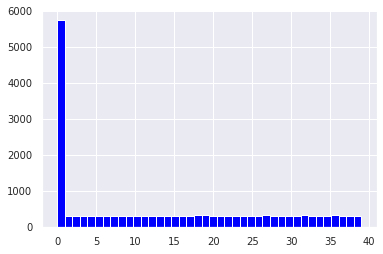

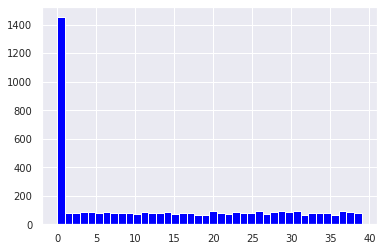

In [195]:
from matplotlib import pyplot as plt

plt.hist(train_labels_r,families_num_data, facecolor='blue')
plt.show()


plt.hist(test_labels_r,families_num_data, facecolor='blue')
plt.show()

## Optional: Pick a subset

Pick a subset of the families

In [0]:
# # families_num_chosen = 20
# print(X_families)
# # indices_chosen = [2,6,8,10,11,12,17,18,24,25,29,30,33,39,52,55]
# indices_chosen = [3,6,8,10,11,12,17,18,24,25,29,30,33,39,45,51,55]

# indices_chosen_num = len(indices_chosen)
# families_chosen = []
# print(indices_chosen_num)
# for ind in indices_chosen:
#   print(X_families[ind])
#   families_chosen.append(X_families[ind])
  
# print(families_chosen)


(6400, 256, 3)
(6400,)
('Train points shape: ', (4608, 256, 3))
('Validation points shape: ', (1152, 256, 3))
('Test points shape: ', (640, 256, 3))


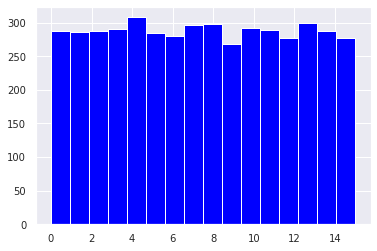

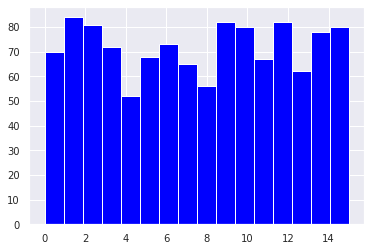

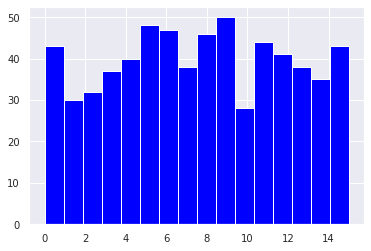

In [196]:
indices_chosen = [2,4,6,8,10,11,12,15,17,18,22,24,31,33,37,39]
indices_chosen_num = len(indices_chosen)
families_example_choosen = 400
choosen_data = np.zeros([families_example_choosen*indices_chosen_num,256,3])
choosen_labels = np.zeros([families_example_choosen*indices_chosen_num])
counter = 0

for ind in indices_chosen:
  choosen_data[counter*families_example_choosen:(counter+1)*families_example_choosen] = all_data[ind*families_example_data:ind*families_example_data+families_example_choosen]
  choosen_labels[counter*families_example_choosen:(counter+1)*families_example_choosen] = np.array(families_example_choosen*[counter])
  counter = counter+1
# print(choosen_labels)
#   choosen_labels(counter*families_example_choosen[(counter+1)*families_example_choosen)] = all_labels(ind*families_example_data:ind*families_example_data+families_example_choosen)
  
print(choosen_data.shape)
print(choosen_labels.shape)


train_points_r, test_points_r, train_labels_r, test_labels_r = train_test_split(
    choosen_data,choosen_labels, test_size=0.1, random_state=1)  # 1 was used previously

train_points_r, val_points_r, train_labels_r, val_labels_r = train_test_split(
    train_points_r,train_labels_r, test_size=0.2, random_state=1)  # 1 was used previously

print(('Train points shape: ' ,train_points_r.shape))
print(('Validation points shape: ',val_points_r.shape))
print(('Test points shape: ',test_points_r.shape))


from matplotlib import pyplot as plt

plt.hist(train_labels_r,indices_chosen_num, facecolor='blue')
plt.show()

plt.hist(val_labels_r,indices_chosen_num, facecolor='blue')
plt.show()

plt.hist(test_labels_r,indices_chosen_num, facecolor='blue')
plt.show()



### Hyper parameters group

In [0]:
# Data hyper parameters 
# families_num = 57
families_num = indices_chosen_num


num_points = 256

# Augmentation hyper parameters
# jitter_sigma = 0.02 * 150
Dropout_val = 0.3
jitter_sigma = 0.5
  
  
batch_size = 512
learning_rate = 6e-3  #  3e-3
lr_drop = 0.4
drop_epoch = 8       # 6
epoch_num = 80     # 100


from keras.callbacks import LearningRateScheduler

def step_decay_schedule(initial_lr=learning_rate, decay_factor=lr_drop, step_size=drop_epoch):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
#         Manual_steps = [[initial_lr] * 5 [initial_lr*0.1]]
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr= learning_rate, decay_factor=lr_drop, step_size=drop_epoch)


### Data preperation 

Centering every protein around zero by subtracting the mean for every column (x,y,z) for every protein.

In [0]:
from keras.utils import np_utils
train_points_r = train_points_r[:,0:num_points,:]
val_points_r = val_points_r[:,0:num_points,:]
test_points_r = test_points_r[:,0:num_points,:]

# label to categorical
Y_train = np_utils.to_categorical(train_labels_r, families_num)
Y_val = np_utils.to_categorical(val_labels_r, families_num)
Y_test = np_utils.to_categorical(test_labels_r, families_num)


# from sklearn.preprocessing import normalize
for train_ind in np.arange(0,train_points_r.shape[0]):
#   print(np.mean(train_points_r[train_ind,:,:],axis = 0))
  train_points_r[train_ind,:,:] = train_points_r[train_ind,:,:] - np.mean(train_points_r[train_ind,:,:],axis = 0)


for val_ind in np.arange(0,val_points_r.shape[0]):
  val_points_r[val_ind,:,:] = val_points_r[val_ind,:,:] - np.mean(val_points_r[val_ind,:,:],axis = 0)
  
for test_ind in np.arange(0,test_points_r.shape[0]):
  test_points_r[test_ind,:,:] = test_points_r[test_ind,:,:] - np.mean(test_points_r[test_ind,:,:],axis = 0)

### Data inspection - plotting examples

#### Part 1: Plotting random labels

In [0]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


row_num = 5
col_num = 10
Images_num = row_num * col_num

plt.figure(0)
plt.figure(figsize=(col_num*6, row_num*6))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= None, hspace=0.5)


for i in np.arange(0,Images_num,1):
  ax = plt.subplot(row_num, col_num, i+1, projection='3d')
#   ax = Axes3D(a)
  train_images_try = train_points_r[i,:,:] 
  ax.scatter(train_images_try[:,0],train_images_try[:,1],train_images_try[:,2],alpha=0.5)
  plt.title(['Label: ' , train_labels_r[i]])
plt.show()
  
  

Output hidden; open in https://colab.research.google.com to view.

### Family plot

Including augmentation: 
<br> 
  Random rotation betweeon 0 and 2 pi
 <br>
 Adding random noise for each point, generated from gaussian distribution with sigma = jitter_sigma

In [0]:
import random

family_label = 5


row_num = 5
col_num = 10
Images_num = row_num * col_num

plt.figure(0)
plt.figure(figsize=(col_num*6, row_num*6))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= None, hspace=0.5)

counter_plot = 0
counter_loop = 0 
while counter_plot < row_num * col_num :
  if train_labels_r[counter_loop] == family_label:
    ax = plt.subplot(row_num, col_num, counter_plot+1, projection='3d')
    train_images_try = train_points_r[counter_loop,:,:] + jitter_sigma * np.random.randn(num_points, 3)
    rotation_angle = np.random.uniform() * 2 * np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    rotation_matrix = np.array([[cosval, 0, sinval],
                                [0, 1, 0],
                                [-sinval, 0, cosval]])
    train_images_try = np.dot(train_images_try.reshape((-1, 3)), rotation_matrix)
    ax.scatter(train_images_try[:,0],train_images_try[:,1],train_images_try[:,2])
    plt.title(train_labels_r[counter_loop])
    counter_plot = counter_plot + 1
  counter_loop += 1
# print(np.random.randn(num_points, 2).shape)
# print(train_images_try[:,2])

Output hidden; open in https://colab.research.google.com to view.

### Part 3: single protein augmentations

[1336 2234 1902 1013 1482]


<Figure size 432x288 with 0 Axes>

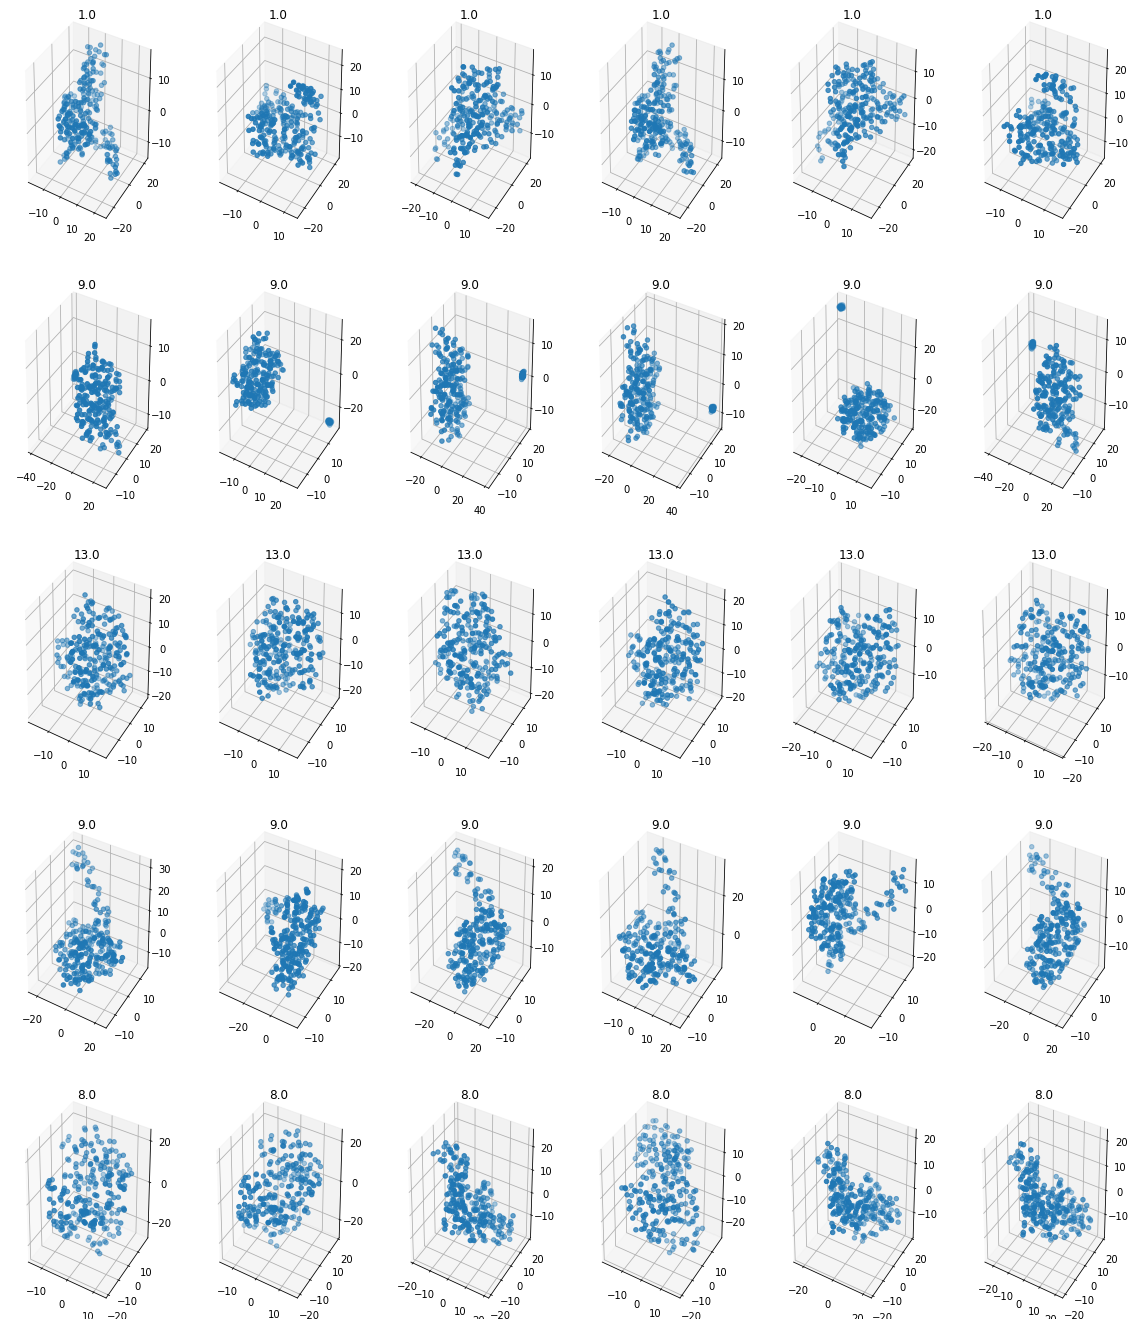

In [0]:
protein_num = 5
examples_per_image = 6
Images_num = row_num * col_num

plt.figure(0)
plt.figure(figsize=(protein_num*4, examples_per_image*4))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= None, hspace=0.5)

counter_plot = 0
counter_loop = 0 
indices = np.random.choice(train_labels_r.shape[0],protein_num)
print(indices)
for ind in indices:
  for example_num in np.arange(0,examples_per_image,1):
  # while counter_plot < row_num * col_num :
    ax = plt.subplot(protein_num,examples_per_image , counter_plot+1, projection='3d')
    train_images_try = train_points_r[ind,:,:] + jitter_sigma * np.random.randn(num_points, 3)
    rotation_angle = np.random.uniform() * 2 * np.pi
    cosval = np.cos(rotation_angle)
    sinval = np.sin(rotation_angle)
    rotation_matrix = np.array([[cosval, 0, sinval],
                                [0, 1, 0],
                                [-sinval, 0, cosval]])
    train_images_try = np.dot(train_images_try.reshape((-1, 3)), rotation_matrix)
    ax.scatter(train_images_try[:,0],train_images_try[:,1],train_images_try[:,2])
    plt.title(train_labels_r[ind])
    counter_plot += 1

plt.show()
# # print(np.random.randn(num_points, 2).shape)
# # print(train_images_try[:,2])

### Data augmentation

In [200]:
# In the generator 57 appears



def rotate_point_cloud(batch_data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
    for k in range(batch_data.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k, ...]
        rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
    return rotated_data


def jitter_point_cloud(batch_data, sigma , clip=0): # 0.01 orig  #0.0001 worked well
    """ Randomly jitter points. jittering is per point.
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, jittered batch of point clouds
    """
    B, N, C = batch_data.shape
#     jittered_data = np.clip(sigma * np.random.randn(B, N, C), -1 * clip, clip)
    jittered_data = sigma * np.random.randn(B, N, C)
#     jittered_data = jittered_data * np.random.normal(0.8,1,1) 
    jittered_data += batch_data  
    return jittered_data

  
  


def cloud_point_generator(cloud_point , labels, sigma ,batch_size ,clip = 0,jitter_point_cloud = jitter_point_cloud,rotate_point_cloud = rotate_point_cloud,family_num = families_num):
  while True:
    indices = np.random.choice(cloud_point.shape[0], np.int(batch_size), replace=False)
    cloud_point_choosen = cloud_point[indices]
    labels_chosen = labels[indices]
    Y_labels = np_utils.to_categorical(labels_chosen, family_num)


    cloud_point_choosen_rotated = rotate_point_cloud(cloud_point_choosen)
    train_points_jitter = jitter_point_cloud(cloud_point_choosen_rotated,sigma)
    yield (train_points_jitter , Y_labels)
  
  
  
# a , b = cloud_point_generator(train_points_r,train_labels_r,sigma = 0.01,clip=0,batch_size = 50)
# print(a.shape)
# print(b.shape)

# print(Y_train.shape)
##############################################################################################################
print('Defining the batch generator with basic cloud point augmentation... Done!')

Defining the batch generator with basic cloud point augmentation... Done!


### Keras callbacks 

In [0]:
from tensorflow.keras.optimizers import Adam , RMSprop , Adadelta , Adamax , Nadam , Adagrad 
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, LearningRateScheduler, History


path_to_data_dir = "/content/gdrive/My Drive/DL-ML/3D molecular 1807/"
filepath= path_to_data_dir + "best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')





In [203]:
#-*- coding: utf-8 -*-



"""
Created on Thu Dec 28 15:39:40 2017

@author: Gary
"""

import tensorflow as tf
from keras import optimizers
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.layers import Convolution1D, MaxPooling1D, BatchNormalization
from keras.layers import Lambda


def mat_mul(A, B):
    return tf.matmul(A, B)



# adam = optimizers.Adam(lr=0.1, decay= 0.1/epoch_num)
adam = optimizers.Adagrad(lr= learning_rate ,decay= 0)   #0.01 , 0.7 worked well

# ------------------------------------ Pointnet Architecture
# input_Transformation_net
input_points = Input(shape=(num_points, 3))
x = Convolution1D(64, 1, activation='relu',
                  input_shape=(num_points, 3))(input_points)
x = BatchNormalization()(x)
x = Convolution1D(128, 1, activation='relu')(x)
x = BatchNormalization()(x)
x = Convolution1D(1024, 1, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=num_points)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(9, weights=[np.zeros([256, 9]), np.array([1, 0, 0, 0, 1, 0, 0, 0, 1]).astype(np.float32)])(x)
input_T = Reshape((3, 3))(x)

# forward net
g = Lambda(mat_mul, arguments={'B': input_T})(input_points)
g = Convolution1D(64, 1, input_shape=(num_points, 3), activation='relu')(g)
g = BatchNormalization()(g)
g = Convolution1D(64, 1, input_shape=(num_points, 3), activation='relu')(g)
g = BatchNormalization()(g)

# feature transform net
f = Convolution1D(64, 1, activation='relu')(g)
f = BatchNormalization()(f)
f = Convolution1D(128, 1, activation='relu')(f)
f = BatchNormalization()(f)
f = Convolution1D(1024, 1, activation='relu')(f)
f = BatchNormalization()(f)
f = MaxPooling1D(pool_size=num_points)(f)
f = Dense(512, activation='relu')(f)
f = BatchNormalization()(f)
f = Dense(256, activation='relu')(f)
f = BatchNormalization()(f)
f = Dense(64 * 64, weights=[np.zeros([256, 64 * 64]), np.eye(64).flatten().astype(np.float32)])(f)
feature_T = Reshape((64, 64))(f)

# forward net
g = Lambda(mat_mul, arguments={'B': feature_T})(g)
g = Convolution1D(64, 1, activation='relu')(g)
g = BatchNormalization()(g)
g = Convolution1D(128, 1, activation='relu')(g)
g = BatchNormalization()(g)
g = Convolution1D(1024, 1, activation='relu')(g)
g = BatchNormalization()(g)

# global_feature
global_feature = MaxPooling1D(pool_size=num_points)(g)

# point_net_cls
c = Dense(512, activation='relu')(global_feature)
c = BatchNormalization()(c)
c = Dropout(rate=Dropout_val)(c)   # 0.7!! orig 0.3 was good ~0.12 at ~20 epochs
c = Dense(256, activation='relu')(c)
c = BatchNormalization()(c)
c = Dropout(rate=Dropout_val)(c)
c = Dense(families_num, activation='softmax')(c)
prediction = Flatten()(c)
# --------------------------------------------------end of pointnet

# # print the model summary
model = Model(inputs=input_points, outputs=prediction)
print(model.summary())

# # compile classification model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


    
train_generator = cloud_point_generator(train_points_r , train_labels_r , jitter_sigma , batch_size, clip = 0 )
  
  
  
steps_per_epoch=train_points_r.shape[0]/batch_size
num_valid_samples =  val_points_r.shape[0]/batch_size

history = model.fit_generator(train_generator,steps_per_epoch,epoch_num, validation_data=(val_points_r, Y_val), 
                              validation_steps=num_valid_samples,callbacks = [lr_sched] , verbose=1)

# history = model.fit(train_points_jitter, train_labels_r, batch_size= batch, epochs=epoch_num, shuffle=True,validation_data=(test_points_r, test_labels_r),
#                     callbacks = [lr_sched] , verbose=1)  # Batch size 32 orig






# Changed clip



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 3)            0         
_________________________________________________________________
lambda_5 (Lambda)            (None, 256, 3)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 256, 64)           256       
_________________________________________________________________
batch_normalization_40 (Batc (None, 256, 64)           256       
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 256, 64)           4160      
_________________________________________________________________
batch_normalization_41 (Batc (None, 256, 64)           256       
_________________________________________________________________
lambda_6 (Lambda)            (None, 256, 64)           0   

### Network visualisations

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


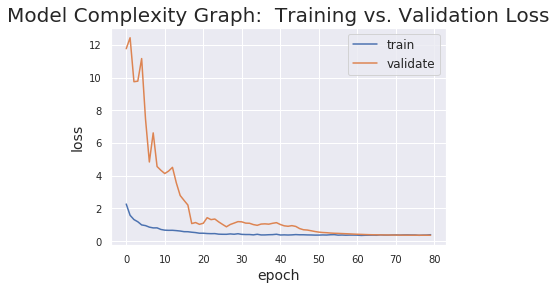

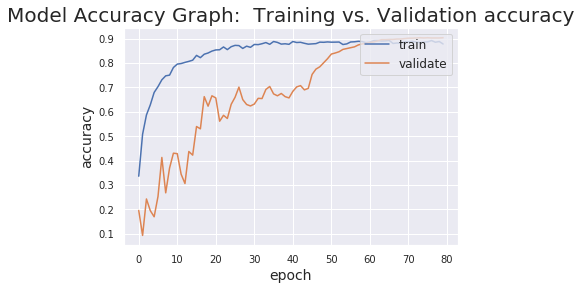

In [204]:
plt.figure(3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

plt.figure(4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()


/content/gdrive/My Drive/DL-ML/3D molecular Aligned/Accuracy.png


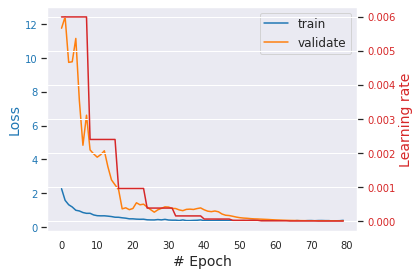

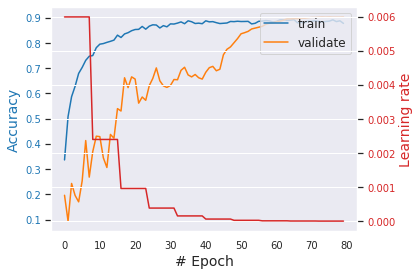

In [205]:
path_to_data_dir = "/content/gdrive/My Drive/DL-ML/3D molecular Aligned/"

print(path_to_data_dir+'Accuracy.png')


lr_used = np.zeros(epoch_num)
for epoch in range (0,epoch_num):
  lr_used[epoch] = learning_rate * (lr_drop ** np.floor(epoch/drop_epoch))


epochs_used = np.arange(0,epoch_num)
loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])
lr_used = lr_used
acc = np.array(history.history['acc'])
val_acc = np.array(history.history['val_acc'])

  

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('# Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs_used, loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)
color = 'tab:orange'
ax1.plot(epochs_used, val_loss, color=color)
plt.legend(['train', 'validate'], loc='upper right')
plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'tab:red'
ax2.set_ylabel('Learning rate', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs_used, lr_used, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(path_to_data_dir+'val_loss.png')
plt.show()






fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('# Epoch')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(epochs_used, acc, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax1.plot(epochs_used, val_acc, color=color)
plt.legend(['train', 'validate'], loc='upper right')
plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Learning rate', color=color)  # we already handled the x-label with ax1
ax2.plot(epochs_used, lr_used, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(path_to_data_dir+'Accuracy.png')
plt.show()






### Families to labels

In [206]:
# labels = ['3.20.20.140','2.30.30.40','3.20.20.70','3.90.226.10','3.40.30.10','3.90.1150.10','1.20.1050.10','3.40.50.1820','3.20.20.80','1.10.510.10', '2.60.120.10', '3.10.180.10', '3.40.50.2300', '3.10.450.50', '3.30.420.40', '3.40.50.1980', '1.10.10.10', '2.60.40.420', '2.60.120.200', '2.60.120.260', '3.40.640.10', '3.50.50.60', '2.130.10.10', '1.10.238.10', '3.40.50.150', '3.40.47.10', '2.40.50.140', '3.40.50.2000', '2.60.40.1180', '1.10.10.60','2.80.10.50', '2.30.42.10', '2.30.29.30','3.40.190.10','3.40.50.1000','3.40.630.30', '3.10.20.90', '3.40.50.620', '3.30.70.330', '3.10.129.10'];
labels = X_families
# labels = families_chosen
print('All labels ',labels)
print('Indices chosen ',indices_chosen)

results = [int(i) for i in indices_chosen]
labels_chosen = []
for ind in results:
  labels_chosen.append(labels[ind])

print('Labels chosen' ,labels_chosen)


from sklearn.metrics import confusion_matrix
y_vecs = model.predict(test_points_r)
y_pred = np.argmax(y_vecs, axis=1)
y_true = test_labels_r
cm = confusion_matrix(test_labels_r, y_pred)

print (cm)
print(path_to_data_dir)

All labels  ['1.10.10.10', '1.10.10.60', '1.10.238.10', '1.10.510.10', '1.20.1050.10', '2.130.10.10', '2.30.29.30', '2.30.30.40', '2.30.42.10', '2.40.50.140', '2.60.120.10', '2.60.120.200', '2.60.120.260', '2.60.40.1180', '2.60.40.420', '2.80.10.50', '3.10.129.10', '3.10.180.10', '3.10.20.90', '3.10.450.50', '3.20.20.140', '3.20.20.70', '3.20.20.80', '3.30.420.40', '3.30.70.330', '3.40.190.10', '3.40.30.10', '3.40.47.10', '3.40.50.1000', '3.40.50.150', '3.40.50.1820', '3.40.50.1980', '3.40.50.2000', '3.40.50.2300', '3.40.50.620', '3.40.630.30', '3.40.640.10', '3.50.50.60', '3.90.1150.10', '3.90.226.10']
Indices chosen  [2, 4, 6, 8, 10, 11, 12, 15, 17, 18, 22, 24, 31, 33, 37, 39]
Labels chosen ['1.10.238.10', '1.20.1050.10', '2.30.29.30', '2.30.42.10', '2.60.120.10', '2.60.120.200', '2.60.120.260', '2.80.10.50', '3.10.180.10', '3.10.20.90', '3.20.20.80', '3.30.70.330', '3.40.50.1980', '3.40.50.2300', '3.50.50.60', '3.90.226.10']
[[36  0  0  0  2  0  0  0  3  0  0  0  1  1  0  0]
 [ 0 29

(16, 16)


<Figure size 432x288 with 0 Axes>

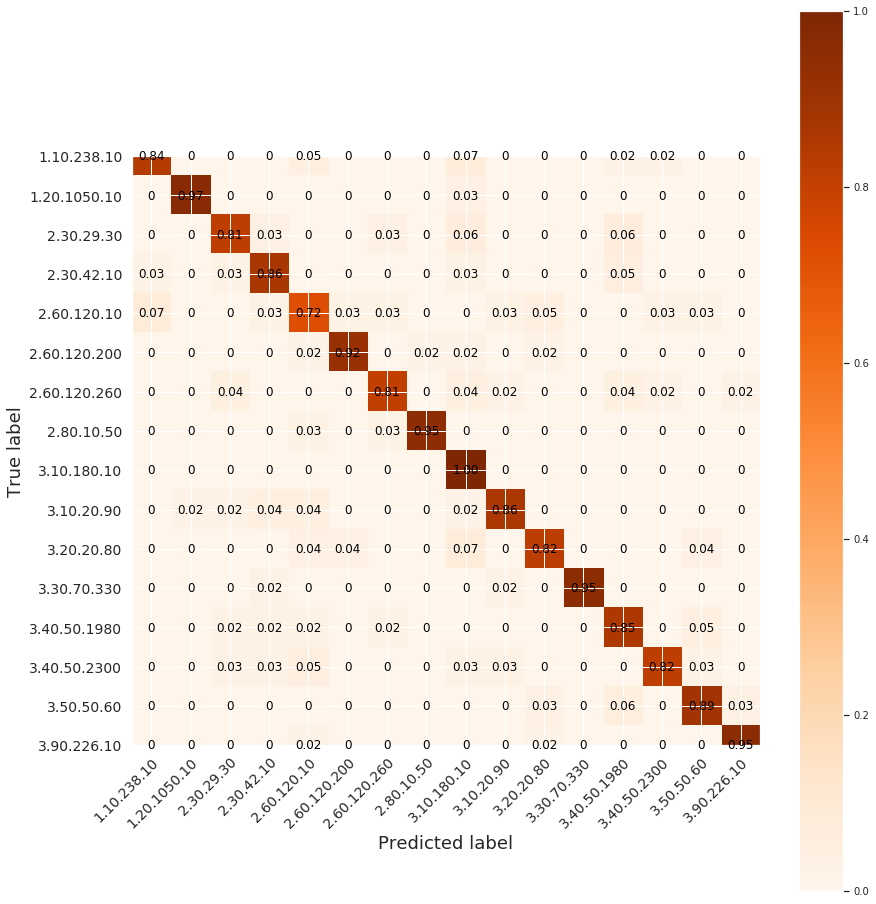

In [220]:
font = {'family' : 'normal',
        'weight' : '400',
        'size'   : 12}
plt.rc('font', **font)

cmap=plt.cm.Oranges
normalize=True

y_true = test_labels_r
y_pred
classes = labels_chosen
cm

print(cm.shape)
if normalize == True:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(7)






fig, ax = plt.subplots(figsize=(13, 13))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# fig.tight_layout()
# plt.rcParams['savefig.facecolor'] = "1"

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]))

ax.set(xticklabels=classes, yticklabels=classes)


ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)

ax.labelsize : 20

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")
# # 
# # We want to show all ticks...
# ax.set(xticks=np.arange(cm.shape[1]),
#         yticks=np.arange(cm.shape[0]),
#         # ... and label them with the respective list entries
#         xticklabels=classes, yticklabels=classes,
#         title=title,
#         ylabel='True label',
#         xlabel='Predicted label')

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#           rotation_mode="anchor")


# # Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
fmt0 = '.1f' if normalize else 'd'

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
          if cm[i, j] == 0:
            ax.text(j, i, 0,
                    ha="center", va="center",color="black")
          else:
            ax.text(j, i, format(cm[i, j],fmt),
                  ha="center", va="center",color="black")

fig.tight_layout()


path_to_data_dir = "/content/gdrive/My Drive/DL-ML/3D molecular Aligned/"
plt.savefig(path_to_data_dir+'Confusion_mat1_norm.png')
plt.show()
 

### Confusion matrix

In [219]:
counter_pos = 0
for i in np.arange(len(y_true)):
  if y_true[i] == y_pred[i]:
    counter_pos+=1

acc = counter_pos / len(y_true)
print(acc)

# print(y_pred[1])
# print(counter_pos)

0.878125
